# Week 2b: Intro to Signal Processing

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import matplotlib.pyplot as plt
import numpy as np

from biosppy import tools as biosppy_tools
from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In the last module, we tried graphing EEG data from the Muse headband ... and it was noisy! :( Don't worry though! In this module, we'll learn how to remove the noise with a library called ***biosppy***. Before we do that, we need to load data! Try loading data from `./../data/stare_blink/csv` into 4 lists: 1 for each electrode on the Muse! Then graph each list into its own subplot on a MatPlotLib figure :)

In [4]:
# Saving Muse EEG values in list: one for each electrode
# Values saved should be FLOATS: aka decimal numbers
l_ear_arr = []
l_forehead_arr = []
r_forehead_arr = []
r_ear_arr = []

# Open file, read data, and store floats in lists
        # row['l_ear'] is a STRING, so need to convert to FLOAT
    
    # Open the file
with open('./../data/stare_blink.csv') as csvfile:
    reader = csv.DictReader(csvfile) # Reader to read from CSV
    for row in reader: 
        l_ear_arr.append(float(row['l_ear']))
        l_forehead_arr.append(float(row['l_forehead']))
        r_forehead_arr.append(float(row['r_forehead'])) 
        r_ear_arr.append(float(row['r_ear']))

C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

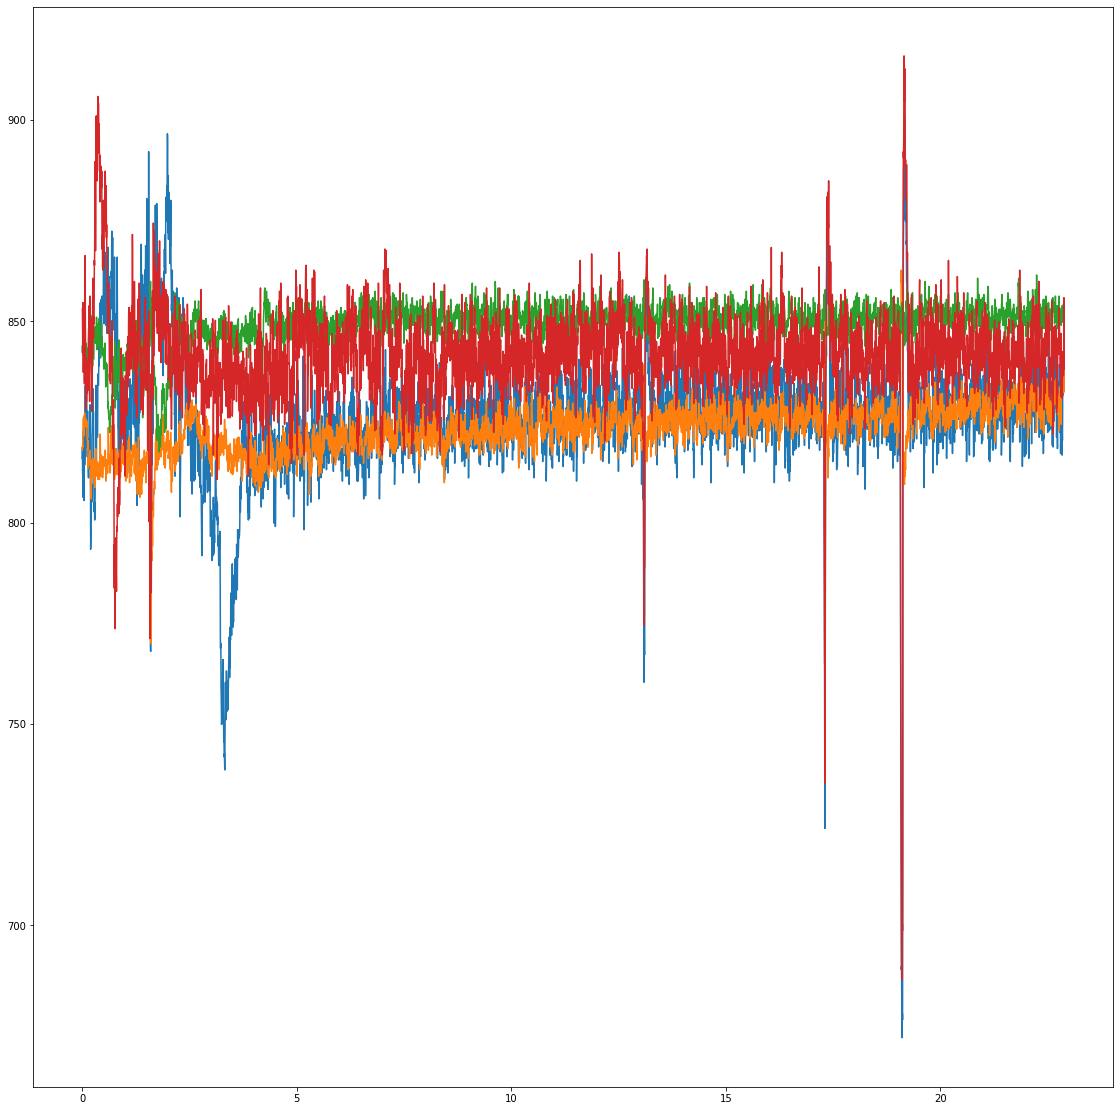

In [6]:
# Try making a function that plots data for you; we'll need to plot a lot so might as well reuse code :)
def plot_muse(l_ear_arr, l_forehead_arr, r_forehead_arr, r_ear_arr):
    '''
    Plots data from the Muse.
    Args:
        l_ear_arr (list): EEG data from left ear
        l_forehead_arr (list): EEG data from left forehead
        r_forehead_arr (list): EEG data from right forehead
        r_ear_arr (list): EEG data from right ear
        
    PLEASE KEEP IN MIND: The 4 input arrays must be the same size because the x_values are all dependent on the first array's length. 
    '''
    plt.rcParams['figure.figsize'] = [15,15]
    
    x_values = [] 

    for i in range (len(l_ear_arr)): 
        x_values.append(i/256)   # Basically converting the x-axis to being in terms of seconds. 
    
    fig = plt.figure()

    ax_1 = fig.add_axes([1.0, 0.0, 1.0, 1.0]) # These values are floats in 0.0->1.0
    ax_1.plot(x_values, l_ear_arr)

    ax_2 = fig.add_axes([1.0, 0.0, 1.0, 1.0]) # These values are floats in 0.0->1.0
    ax_2.plot(x_values, l_forehead_arr)

    ax_3 = fig.add_axes([1.0, 0.0, 1.0, 1.0]) # These values are floats in 0.0->1.0
    ax_3.plot(x_values, r_forehead_arr)

    ax_4 = fig.add_axes([1.0, 0.0, 1.0, 1.0]) # These values are floats in 0.0->1.0
    ax_4.plot(x_values, r_ear_arr)

    fig.show() #This renders 'fig'

plot_muse(l_ear_arr, l_forehead_arr, r_forehead_arr, r_ear_arr)

First of all, what exactly is EEG? EEG is a measure of the electrical activity that goes on inside your brain, and the Muse acts as a voltmeter to pick up your brain's voltages. But electricity is a ***field*** and is made of 'waves', so it propogates through space, just like sound waves through air.

What does this mean? Well, for a start, your laptop, the lights in this room, literally everything that runs on electricity is creating an electric field! Specifically, these electric fields *oscillate* at 60 times per second, or 60 **hertz** (Hz). So in your recording, you'll notice a *component* of the EEG oscillating at 60Hz!

Note that actual EEG we are interested in analyzing rarely goes above 59Hz, so we can just remove any signal above 59Hz! You can do that like this:

```
b, a = biosppy_tools.get_filter(
                ftype='FIR',
                band='lowpass',
                order=8,
                frequency=59.0,
                sampling_rate=256.0)

filtered_data, _ = biosppy_tools._filter_signal(b, a,
                                                signal=data,
                                                check_phase=True,
                                                axis=0)
```

Try it out, and see what happens! :D

C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

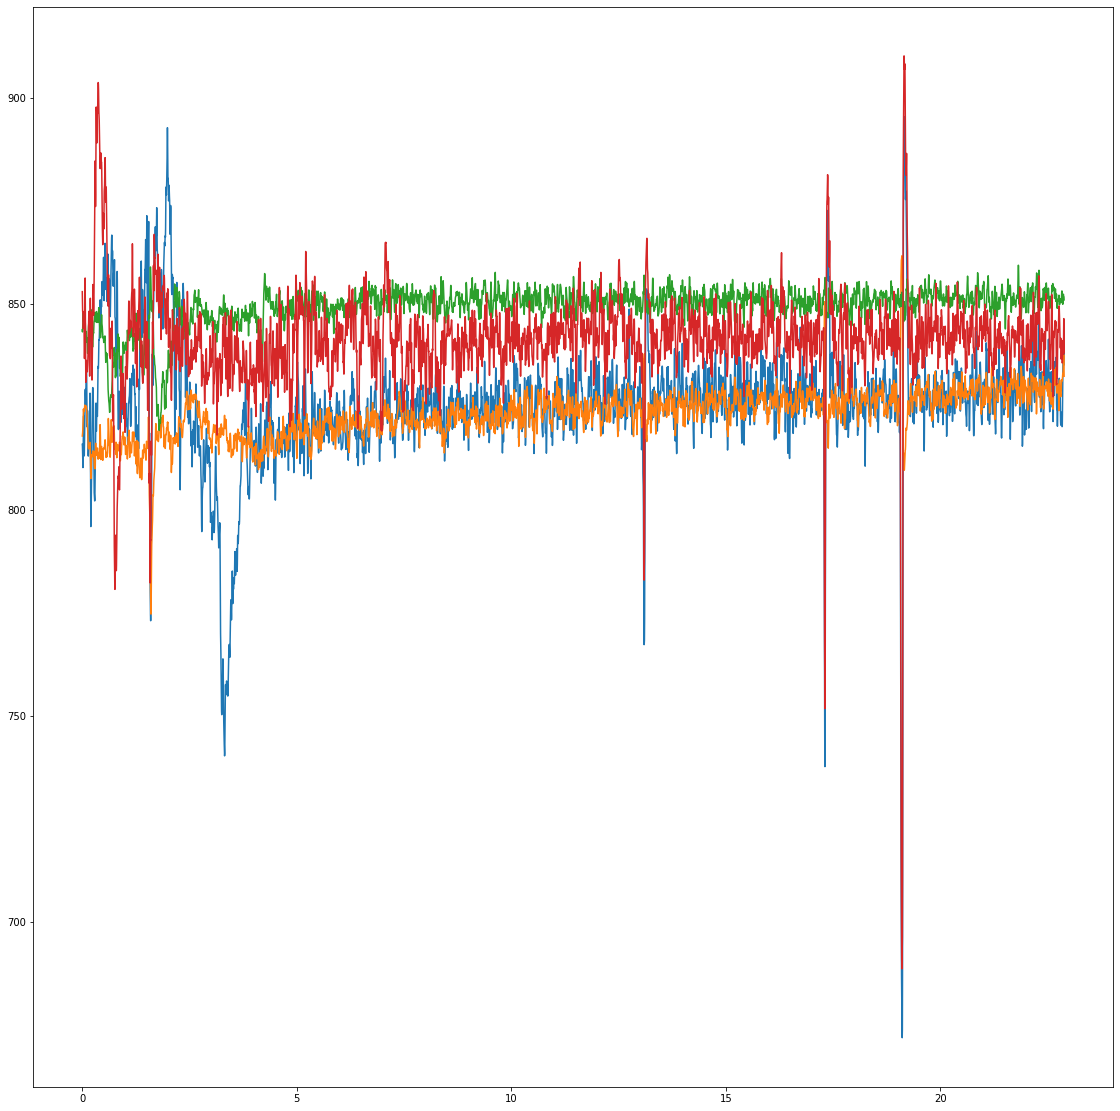

In [7]:
def lowpass_forty_hz(data):
    '''
    Performs low-pass filter with cutoff frequency of 40Hz.
    
    Args:
        data (list): EEG data (1 channel)
    Returns:
        np.array: Filtered data
    '''
    b, a = biosppy_tools.get_filter(ftype='FIR', band='lowpass', order=8, frequency=59.0, sampling_rate=256.0)

    filtered_data, _ = biosppy_tools._filter_signal(b, a, signal=data, check_phase=True, axis=0)

    return filtered_data

l_ear_filt = lowpass_forty_hz(l_ear_arr)
l_forehead_filt = lowpass_forty_hz(l_forehead_arr)
r_forehead_filt = lowpass_forty_hz(r_forehead_arr)
r_ear_filt = lowpass_forty_hz(r_ear_arr)

plot_muse(l_ear_filt, l_forehead_filt, r_forehead_filt, r_ear_filt)

That looks pretty good, but we can do better! Note that the 0Hz component is the same as a sine wave with a period of 1/0 seconds ... pretty much a straight line! Essentially the 0Hz component shifts the graph up and down. We really don't care about that either ... so let's try removing it!

A really simple way of removing the DC component is subtracting the average of the entire signal! You can use the **numpy** library to do this; try it yourself and plot the result!

**Note: The numpy library has been abbreviated to 'np' in the import statement:**

`import numpy as np`

*Hint: try using np.subtract() and np.mean() :)*

C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\minni\Anaconda3\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

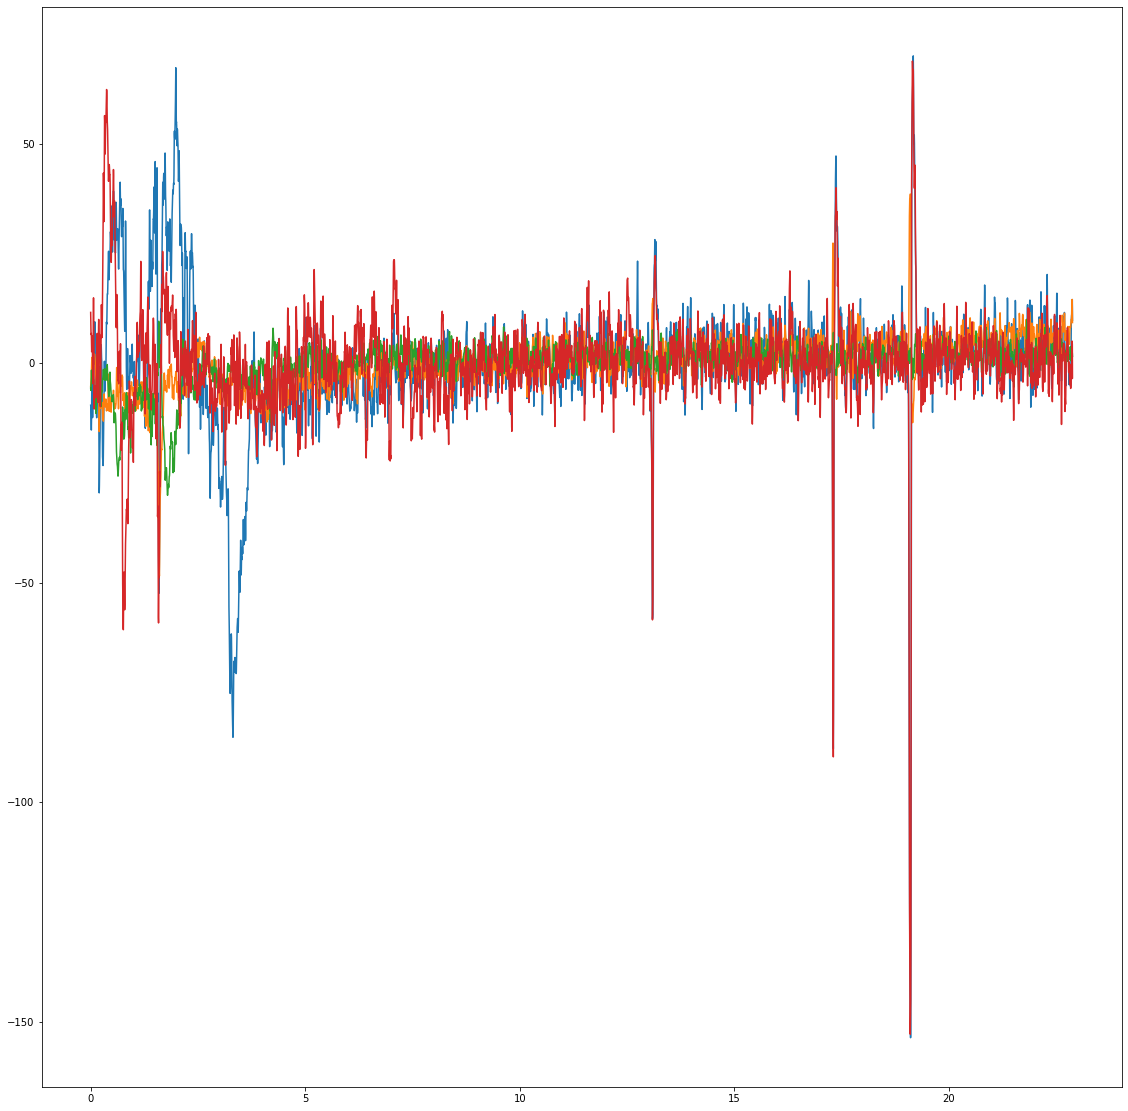

In [8]:
def commonpass_zero_hz(data): 
    signal_avg = np.mean(data) 
    no_DC = data - signal_avg 
    
    return no_DC 

l_ear_morefilt = commonpass_zero_hz(l_ear_filt)
l_forehead_morefilt = commonpass_zero_hz(l_forehead_filt)
r_forehead_morefilt = commonpass_zero_hz(r_forehead_filt)
r_ear_morefilt = commonpass_zero_hz(r_ear_filt)

plot_muse(l_ear_morefilt, l_forehead_morefilt, r_forehead_morefilt, r_ear_morefilt)

Woah ... that worked like **magic**!! In fact, what do we even mean when we say there is a 60Hz component in the EEG? It has to do with *breaking down the function into easier to understand parts.* Let's do some exploring to find out more!

Try graphing $y=sin(x)$ using MatPlotLib for $x={-2\pi...2\pi}$. Use ***np.pi*** and ***np.linspace*** to make a bunch of x values, and ***np.sin*** for the sine:

In [11]:
x_vals = list(range (-np.pi, 0.1, np.pi)) # Darn...float can't be interpreted as an integer. Is there a better fnx than range() for this scenario?

plt.plot (x_vals, np.sin)

TypeError: 'float' object cannot be interpreted as an integer

Now try adding two sines! Graph $y=sin(x) + sin(2x)$ for $x={-2\pi...2\pi}$. What do you notice?

Notice how the graph gets more complex? Have some fun with it! Try the sin of $2x+\pi$ instead of just $2x$ ... or $2(x+2)$ ... or add more things ... or do whatever you want! **Go wild, explore :)**

A bit of backtracking though ... why are we exploring sines and cosines in the first place? There's actually another way of breaking down functions with *polynomials* called the Taylor Series (AP / first year calc anyone?) But here's a slight issue: polynomials don't tell us much about the brain! The brain often *oscillates* at frequencies that tells us a lot about the brain, but polynomials can't give us this information! Neither do they tell us much about oscillations in general. We can easily describe AC (alternating current) electricity as a sinusoidal wave oscillating at 60Hz, but it's a lot harder to describe AC electricity as polynomials!

No worries though! We can do the same approximation trick ... but with ***sines and cosines*** instead!

Try approximating this function with sines and cosines. (It doesn't have to be perfect, but play around with it :) )

```
f(x) = 0 if floor(x) is odd; 1 if floor(x) is even
```
(This function is called a square wave! You can use **signal.square()** to do this :) )

In [ ]:
t = np.linspace(0, 5, 500, endpoint=False)
plt.plot(t, signal.square(np.pi * t))

# Try approximating the square wave below, and graph your approximation on top of the square wave!

There's actually a method to finding the approximation of a function using sines and cosines called the **Fourier series**! With an infinite number of sines and cosines, you can perfectly approximate any periodic function! You can also graph the wave as a function of time. However, sine waves are ***periodic***, so a sine wave behaves the same way over time. Theoretically, you can make a graph, but instead of having a time axis and an amplitude axis, you could have a *frequency* axis and an amplitude axis. Each frequency represents a sine / cosine wave (with an amplitude) *added* to the final function, which will approximate the wave! You could get something like this:

In [ ]:
from IPython.display import HTML

# Youtube video showing how Taylor series works :D
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/r4c9ojz6hJg" frameborder="0" allowfullscreen></iframe>')


And here it is: the ***Fourier Transform***. Because sines and cosines are periodic, you can *change* between ***time domain*** (time vs amplitude) and ***frequency domain*** (frequency of sines in sum, vs amplitudes of sines in sum). Visualizing the frequency domain is super-useful because we can look at sources of noise, and also what's happening inside the brain!